In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [38]:
data= pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Sales_LinReg.csv')
data.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [40]:
data.shape

(305, 6)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Republic  295 non-null    float64
 1   NDTV      300 non-null    float64
 2   TV5       305 non-null    float64
 3   TV9       297 non-null    float64
 4   AajTak    300 non-null    float64
 5   sales     305 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


In [41]:
data.isnull().sum()

Republic    10
NDTV         5
TV5          0
TV9          8
AajTak       5
sales        0
dtype: int64

In [5]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [43]:
data['Republic']=data['Republic'].fillna(data['Republic'].mean())
data['NDTV']=data['NDTV'].fillna(data['NDTV'].mean())

data['TV9']=data['TV9'].fillna(data['TV9'].mean())
data['AajTak']=data['AajTak'].fillna(data['AajTak'].mean())


In [9]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.722438,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.144892,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,23.517967,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


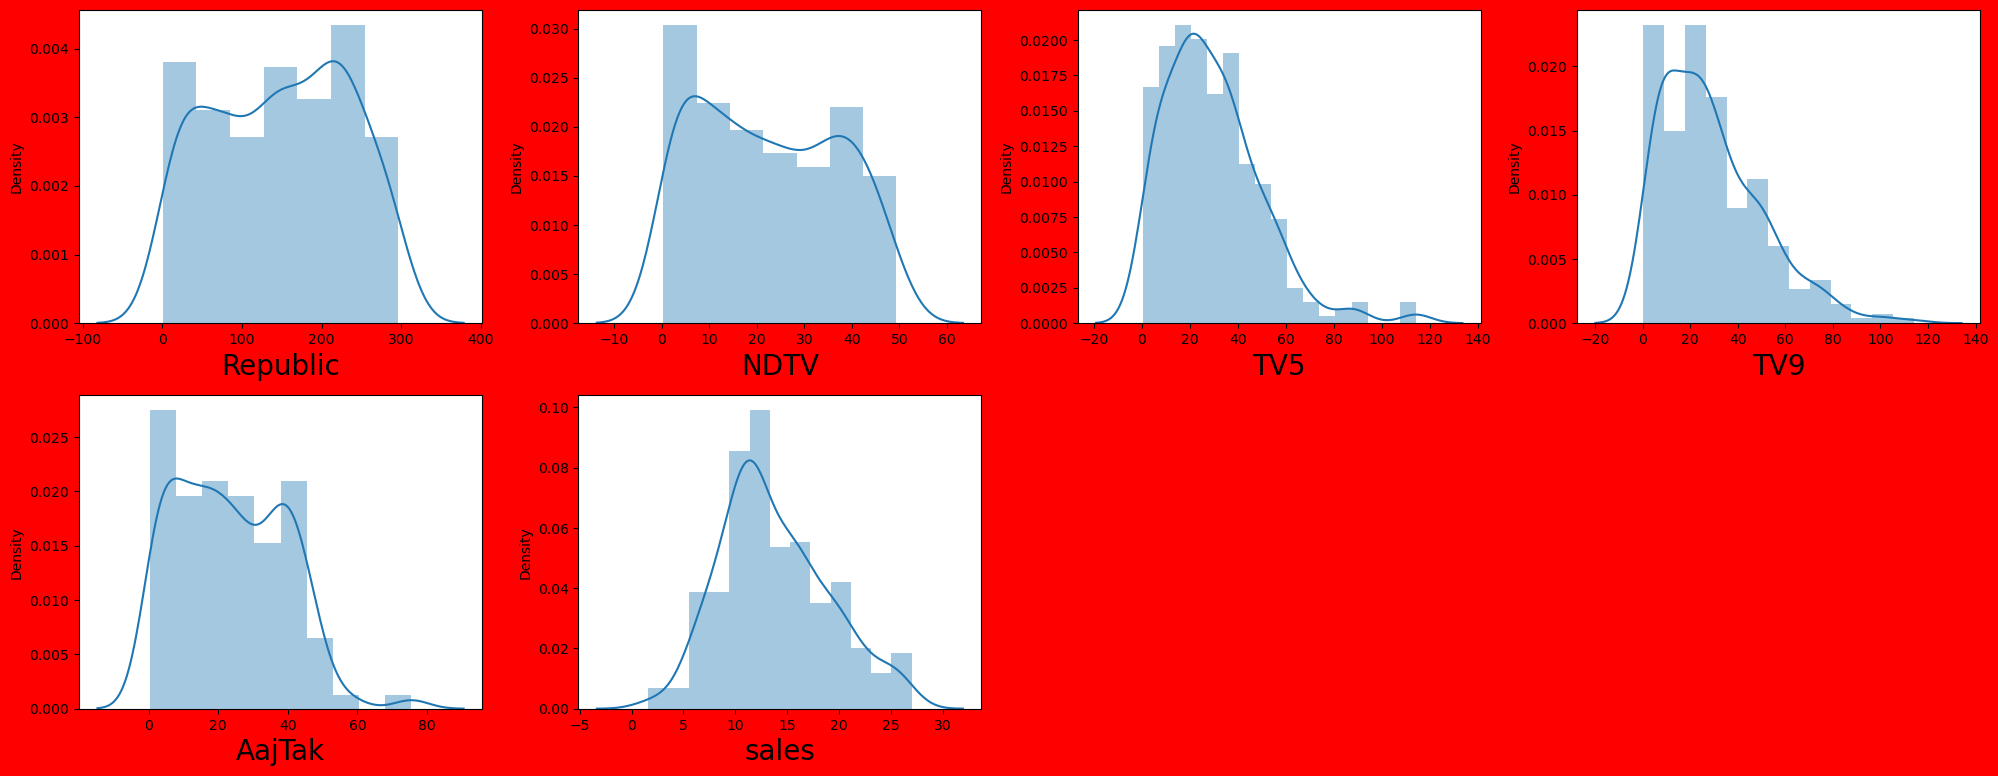

In [44]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber <=6:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    

In [16]:
y=data['sales']
x=data.drop(columns=['sales'])
y

0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
300    15.9
301     6.7
302    10.8
303     9.9
304     5.9
Name: sales, Length: 305, dtype: float64

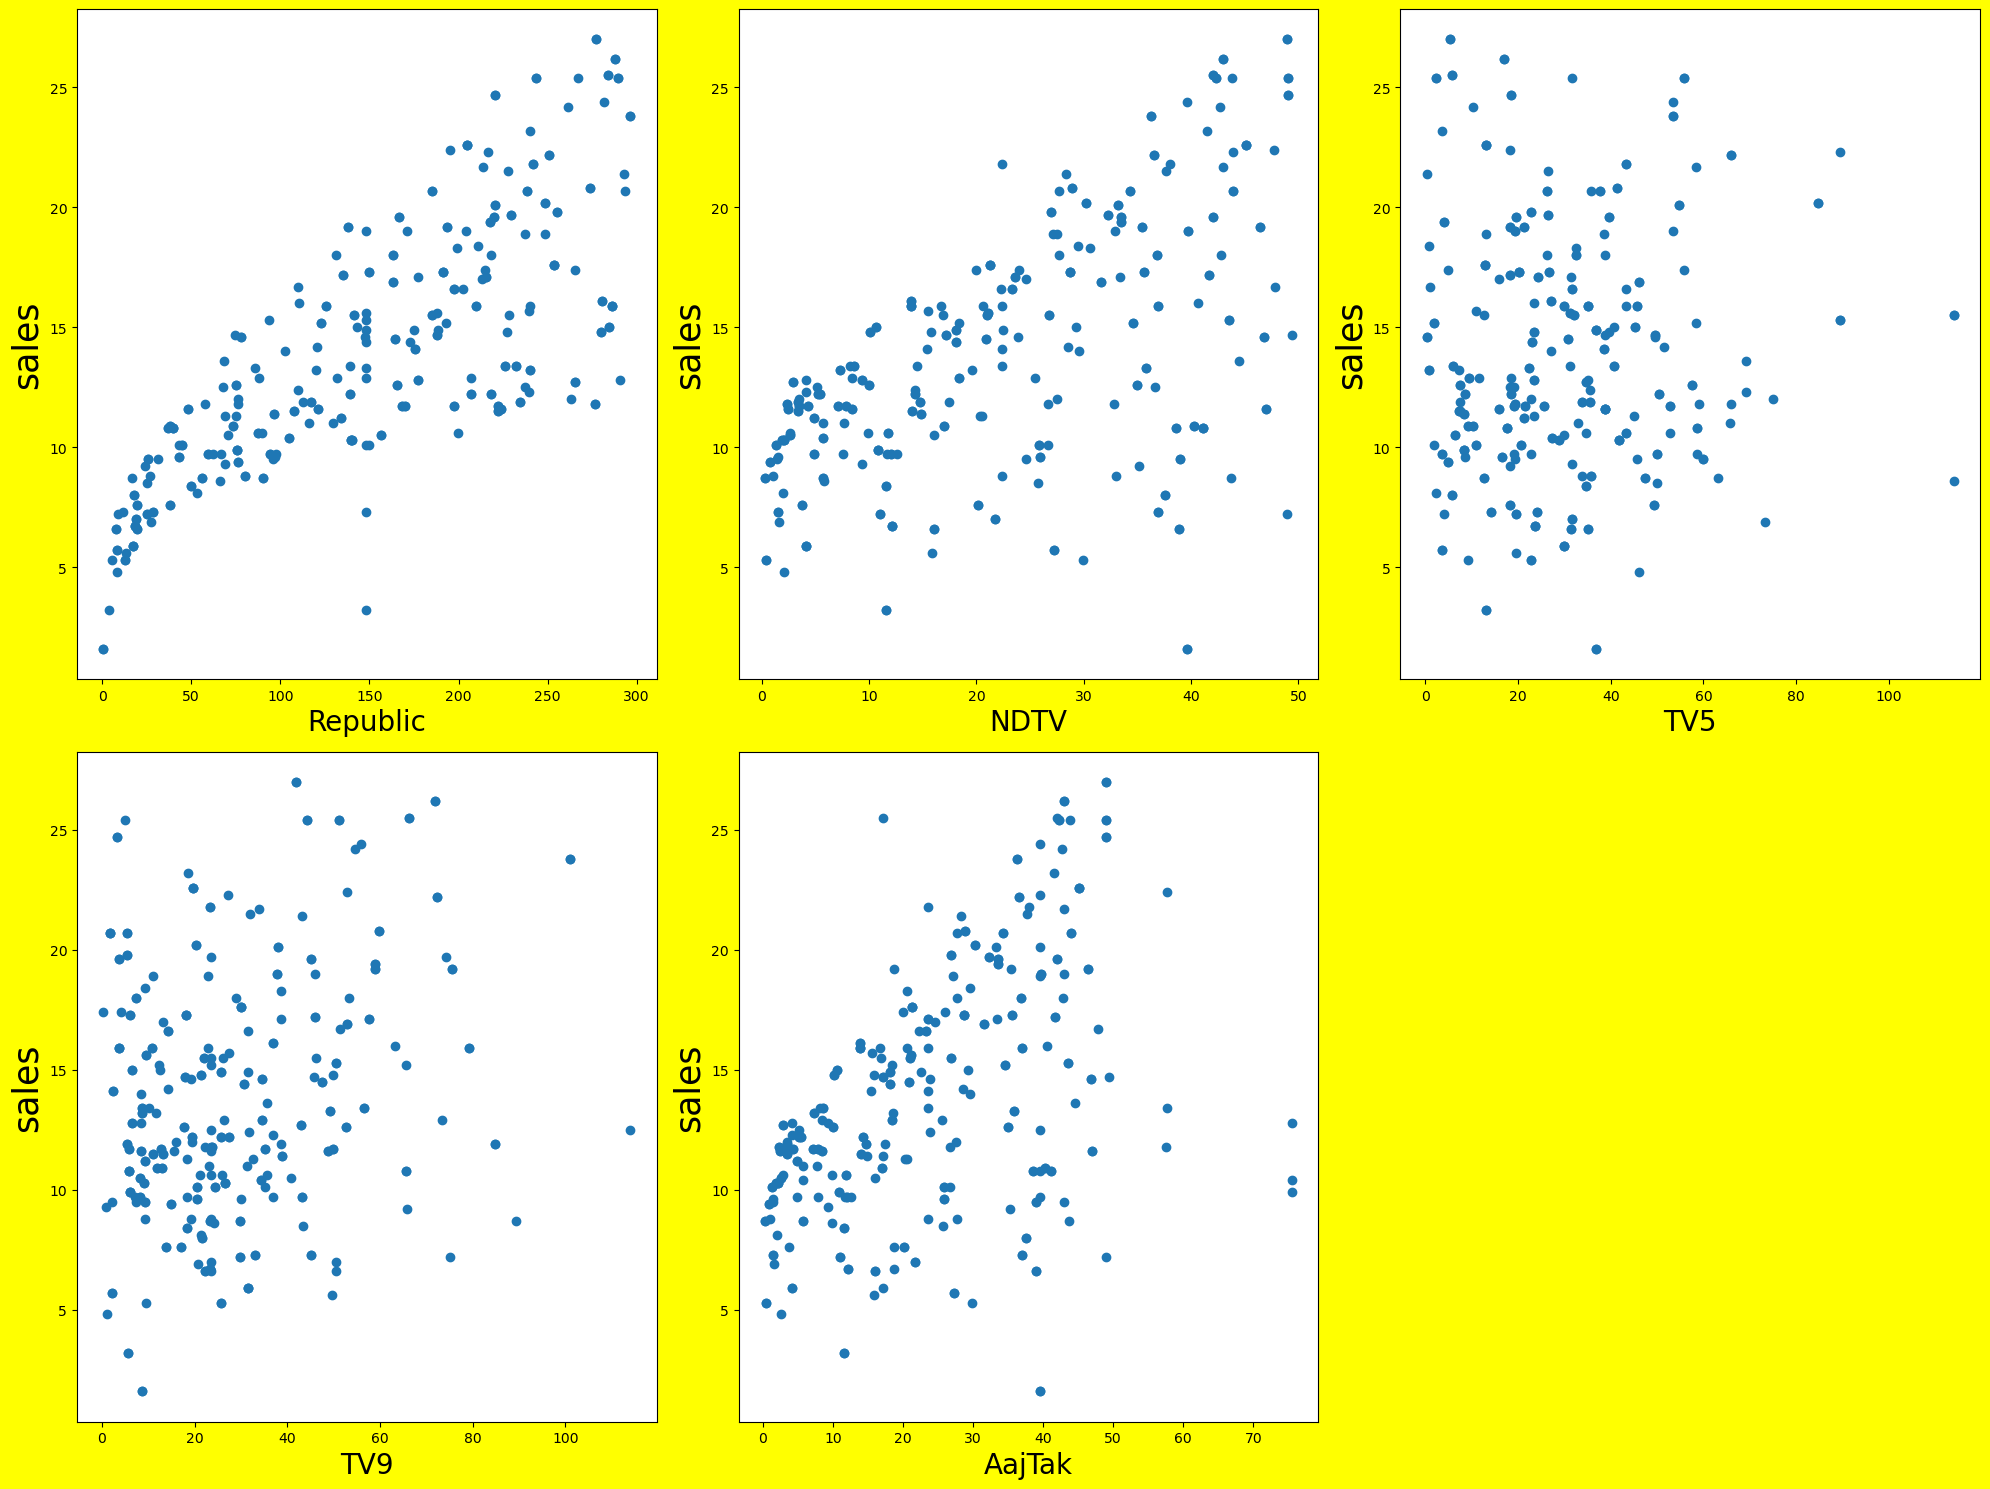

In [47]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('sales',fontsize=25)
    plotnumber+=1
plt.tight_layout()    

In [49]:
x.drop(columns=['TV5','TV9'],axis=1,inplace=True)

In [51]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.62625562e+00,  1.81463603e+00,  1.62336179e+00],
       [-1.05709897e+00,  7.14594359e-01,  2.16486391e+00],
       [-3.25825975e-01, -1.87303162e-01, -3.19675249e-01],
       [-1.62742193e+00, -1.38300063e+00, -1.33260275e+00],
       [ 6.02552502e-01, -1.34883785e+00, -1.31349091e+00],
       [-9.56796774e-01, -1.13019602e+00, -8.73918600e-01],
       [ 7.76331890e-01,  1.13329345e-01,  1.58120744e-01],
       [-1.45014363e+00,  8.71743170e-01,  7.43580100e-01],
       [-5.90577123e-01, -1.00721000e+00, -9.94960252e-01],
       [ 6.52703600e-01,  7.21426916e-01,  1.23475438e+00],
       [ 5.51235099e-01,  1.73264535e+00,  2.17760514e+00],
       [-9.36969595e-01,  9.74231524e-01,  1.02452414e+00],
       [ 1.55425707e+00,  1.17920823e+00,  1.02452414e+00],
       [-9.20641330e-01, -1.25810149e-01, -1.92262984e-01],
       [-9.75742305e-03,  1.06496788e-01,  2.43378661e-02],
       [ 8.19485161e-01,  3.66133953e-01,  2.66421169e-01],
       [ 1.04108304e+00, -1.17802392e+00

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=100)
y_train

249    19.0
257    13.3
120    10.8
88     14.8
177     9.9
       ... 
66     11.8
53     13.4
79     22.2
280    17.6
8       9.7
Name: sales, Length: 228, dtype: float64

In [53]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [54]:
regression.score(x_train,y_train)

0.8610373856773809

In [55]:
regression.score(x_test,y_test)

0.8960140881186806

In [56]:
y_pred=regression.predict(x_test)
r2_score(y_test,y_pred)

0.8960140881186806

In [57]:
x_test[1]

array([ 1.60790708, -0.57675891, -0.61272346])

In [58]:
y_pred=regression.predict(x_test)
y_pred

array([18.97304171, 18.18405491, 10.59864301,  9.6994335 , 13.37367678,
       20.92006139, 13.58347844, 16.0721871 , 21.93788196,  7.29460108,
       17.10593895, 10.60843876, 12.43015234,  6.41350331,  6.44908601,
       16.19798865, 16.97603989, 17.86343179, 17.62574174, 14.89805638,
       19.2968011 , 23.41257562, 17.20572938,  9.83177413, 11.41581273,
        5.62704928, 10.40147313, 10.30741453, 18.23932746, 24.4257962 ,
        7.46766256, 13.25469193, 11.84036627,  4.41795518, 16.10985411,
       12.37726525, 14.13159546,  8.79347782, 16.89863162, 17.80989631,
        5.76795281,  9.6994335 , 19.6132697 , 16.99989987,  6.0032025 ,
       15.56986929,  6.9386588 ,  4.4292651 , 14.67116806, 14.4655671 ,
       13.95434401, 17.10593895,  8.98021543, 22.59282574,  9.45510411,
       20.91876108,  9.47742071, 19.17484783, 14.3556712 , 20.48703822,
       16.79058939, 12.46807849, 19.0424474 , 17.17178909, 18.88002954,
        8.02923788,  9.35621916,  8.73022681,  9.69122441, 23.77

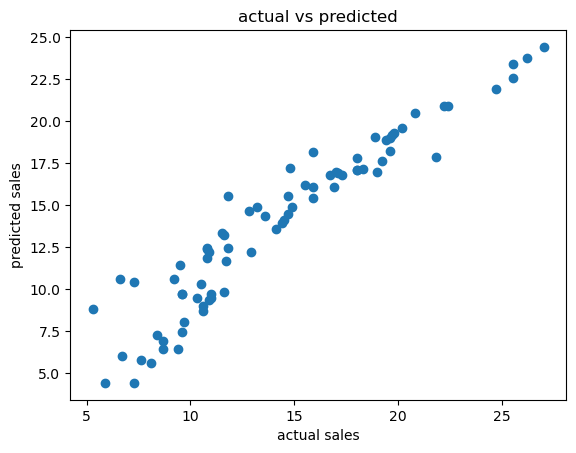

In [59]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual sales')
plt.ylabel('predicted sales')
plt.title('actual vs predicted')
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [61]:
mean_absolute_error(y_test,y_pred)

1.368882704125627

In [62]:
mean_absolute_error(y_test,y_pred)

1.368882704125627

In [63]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

1.6964206941187192

In [64]:
x.tail(2)

,Republic,NDTV,AajTak
303,75.5,10.8,75.5
304,17.2,4.1,17.2


# MACHINE LEARNING

    1 supervised ML
    2 unsupervised ML
    3 SEMI SUPERVISED ML(combination of supervised and unsupervised)
    4 REINFORCEMENT LEARNING (not required)
         
         
 SUPERVISED ML = u need the past data and going to predict future data
  a) Regression 
      when output is having continuous data(-infinity - +infinity)
      eg= salary profit ,height
  b) Classification
      when u build aclassification model ,when output will have categorical data(fix thing, fix no,fix data)
      eg=(+ or -),(yes or no)
      
      
      
 UNSUPERVISED ML
     we will not predict anuthing u will get only input,we will check the similarity based on similarity we will create group, cluster
     
     
     
  REGRESSION ANALYSIS
      it is aprocess of predicting a label based on features(independenr variable)at hand.regression is used for time series and finding the casual effect relationship betwn the variables
      i/p=features/independent variables/predictor
      o/p=labels/target/class/dependent variables
      
      
    USE OF REGRESSION
    1) IT SHOWS THE SIGNIFICANT RELATIONSHIP B/W THE LABEL AND THE FEATURES
    2) IT SHOWS THE EXTENT OF THE IMPACT OF MULTIPLE INDEPENDENT VARIABLES ON THE DEPENDENT VARIABLES
    3) IT CAN ALSO MEASURE THE EFFECTS EVEN IF THE VARIABLES ARE ON A DIFFERENT SCALE.
    
    
    
      

# LINEAR REGRESSION

1) Discrete/continuous independent variables
2) a best -fit regression line
3) continous dependent variable i.e a linear regression model predicts the dependent variable using a regression line based on the independent variables
    
    equation of linear regression 
       y=mx+c+e
       y=prediction
       m=slope/coefficient
       c=intercept
       e= error term

# SIMPLE LINEAR REGRESSION

In [1]:
#NECESSARY IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


what are features?
 1)TV :advertising dollars spent on tv
 2)RADIO :advertising dollars spent on radio
 3)NEWSPAPER : advertising dollars spent on newspaper
 
 what is the response?
 SALES:sales of the single product in agiven market

In [3]:
data.shape

(200, 5)

In [4]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Now let's showcase the relationship b/w the feature and the target column


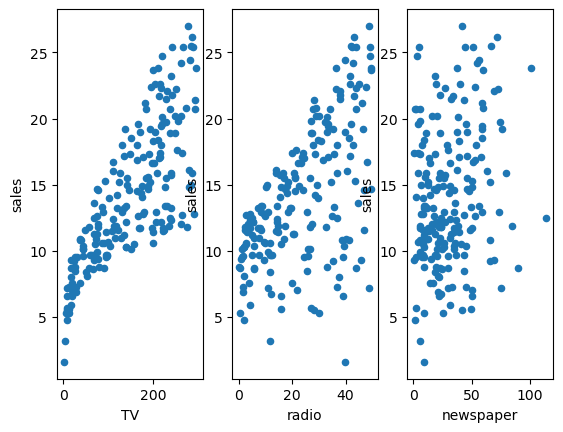

In [6]:
#visualize the relatioship b/w the feature and the response usinf scatter plots
fig,axs=plt.subplots(1,3)
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

QUESTION ABOUT THE DATA
    question:
    
    how the company should optimize the spends on advertising to maximize the sales?
       1) whats btyhe relationship b/w ads and sales?
       2) how prominent is the relationship?
       3) which ads types contribute the sales?
       4) how each ads contributes the sales?
       5) can sales be predicted based on the expense of the advertisement?
  
  
  
                       SIMPLE LINEAR REGRESSION
                       
By taking only one feature u are going to predict 
                           
                    y=mx+c
                         y=response
                         x=feature
                         m=coefficient(slope)
                         c=intercept
                         
                         
  BEST-FIT LINE/REGRESSION LINE/ PREDICTED LINE
  
      AVG ERROR(min error) that line is called the bestfit line, which is very close to the actual data pts
      (millions of data pts)
      
  ERROR/RESIDUALS=( ACTUAL - PREDICTED )
  r= y-(mx +c)  #residuals for one pts
  sum ri= sum(yi-(mxi+ c))
  sum of all residuals will be 0 . in order to avoid that we use sum of sq
   r2= (y -(mx+c))^2  
   
   GRADIENT DESCENT
   gradient= error
   descent= decreasing
      it is learning from its past data and through multiple iteration the prediction error rate is minimised
        the prediction error can't be 0 ~it will be close to it  
         0 = global minima

In [23]:
#create x= feature and y= label
X=data[['TV']] #simple linear regression only 1 feature
y=data.sales
#follow the usual sklearn pattern
from sklearn.linear_model import LinearRegression



In [24]:
#print intercept and coefficient
lm=LinearRegression()
lm.fit(X,y) # training / learning phASE
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


INTERPRETTING MODEL
    : a unit increase in spend on a TV add is associated with a.045 unit increase in sales.
    : or an additional 1000 on tv ads is translated  to an increase in sales by 47.53

In [8]:
#prediction using model
#y=mx+c
y=7.03259+.04753664*50 # theoritical 
y

9.409422

In [25]:
#use the model to predict
lm.predict([[50]])

array([9.40942557])

# MODEL CONFIDENCE

HOW WELL THE MODEL FIT THE DATA?
R-squared= this is one of the evaluation technique which will tell ,how good is the model
    r2 lies b/w (0-1)
    
    
    R2 STATIC(0-1)
      R2=(TSS -RSS)/TSS
      
     RSS(residual sum of square)= summation(y(actual)-y(predicted))^2
 
 
     TSS(total sum of square)= summation(y(actual)-y(mean))^2
 

# METRIC TO CHECK MODEL PERFORMANCE
(r2_score)

In [26]:
from sklearn.metrics import r2_score

In [27]:
predicted_sales=lm.predict(X)

X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [28]:
predicted_sales
r2_score(y,predicted_sales)

0.611875050850071

ADJUSTED R2 STATISTICS
when the feature is more then 1then there is a chance of overfitting in order to avoid this kind of situation we require adjusted r2
      R2adjusted= 1 - ((1- r2)(n-1)/n-p-1)
      r2 = sample r2
      n = no of samples
      p = no of features /predictor

# MULTIPLE  LINEAR  REGRESSION

   y=x0+x1tv+x2radio+x3newspaper

# FEATURE SELECTION

In [17]:
x=data[['TV','radio']]
y=data.sales
lm.fit(x,y)
predicted_sales=lm.predict(x)
r2_score(y,predicted_sales)

0.8971942610828956

In [19]:
#lets do the same for all the features
x=data[['TV','radio','newspaper']]
y=data.sales
lm.fit(x,y)
predicted_sales=lm.predict(x)
r2_score(y,predicted_sales)

0.8972106381789522

# PROJECT_1 with linear regression

PROBLEM STATEMENT
we need to predict the chance of admission based on the students various score

    FEATURES OR INDEPENDENT VARIABLES
    1 GRE SCORE
    2 TOEFL SCORE
    3 UNIVERSITY RATING
    4 SOP
    5 LOR
    6 CGPA
    7 RESEARCH
    
    LABEL/TARGET
    :CHANCE OF ADMIT

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')


In [4]:
#read csv file and convert into dataframe
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [33]:
data.shape

(500, 9)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [36]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [35]:
#understand data at high level.check the statistic of dataset
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
#dropping unwanted columns
data=data.drop(columns=['Serial No.'])

In [6]:
#fill the null values
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [7]:
#verify if nan are filled
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


 Now the data looks good and there are no missing values.also,the first column is just serial number,so we don't need that column.let's drop it from data and make it more clean.
 
 lets visualize the data and analyze the relationship between independent and dependent variables.
 

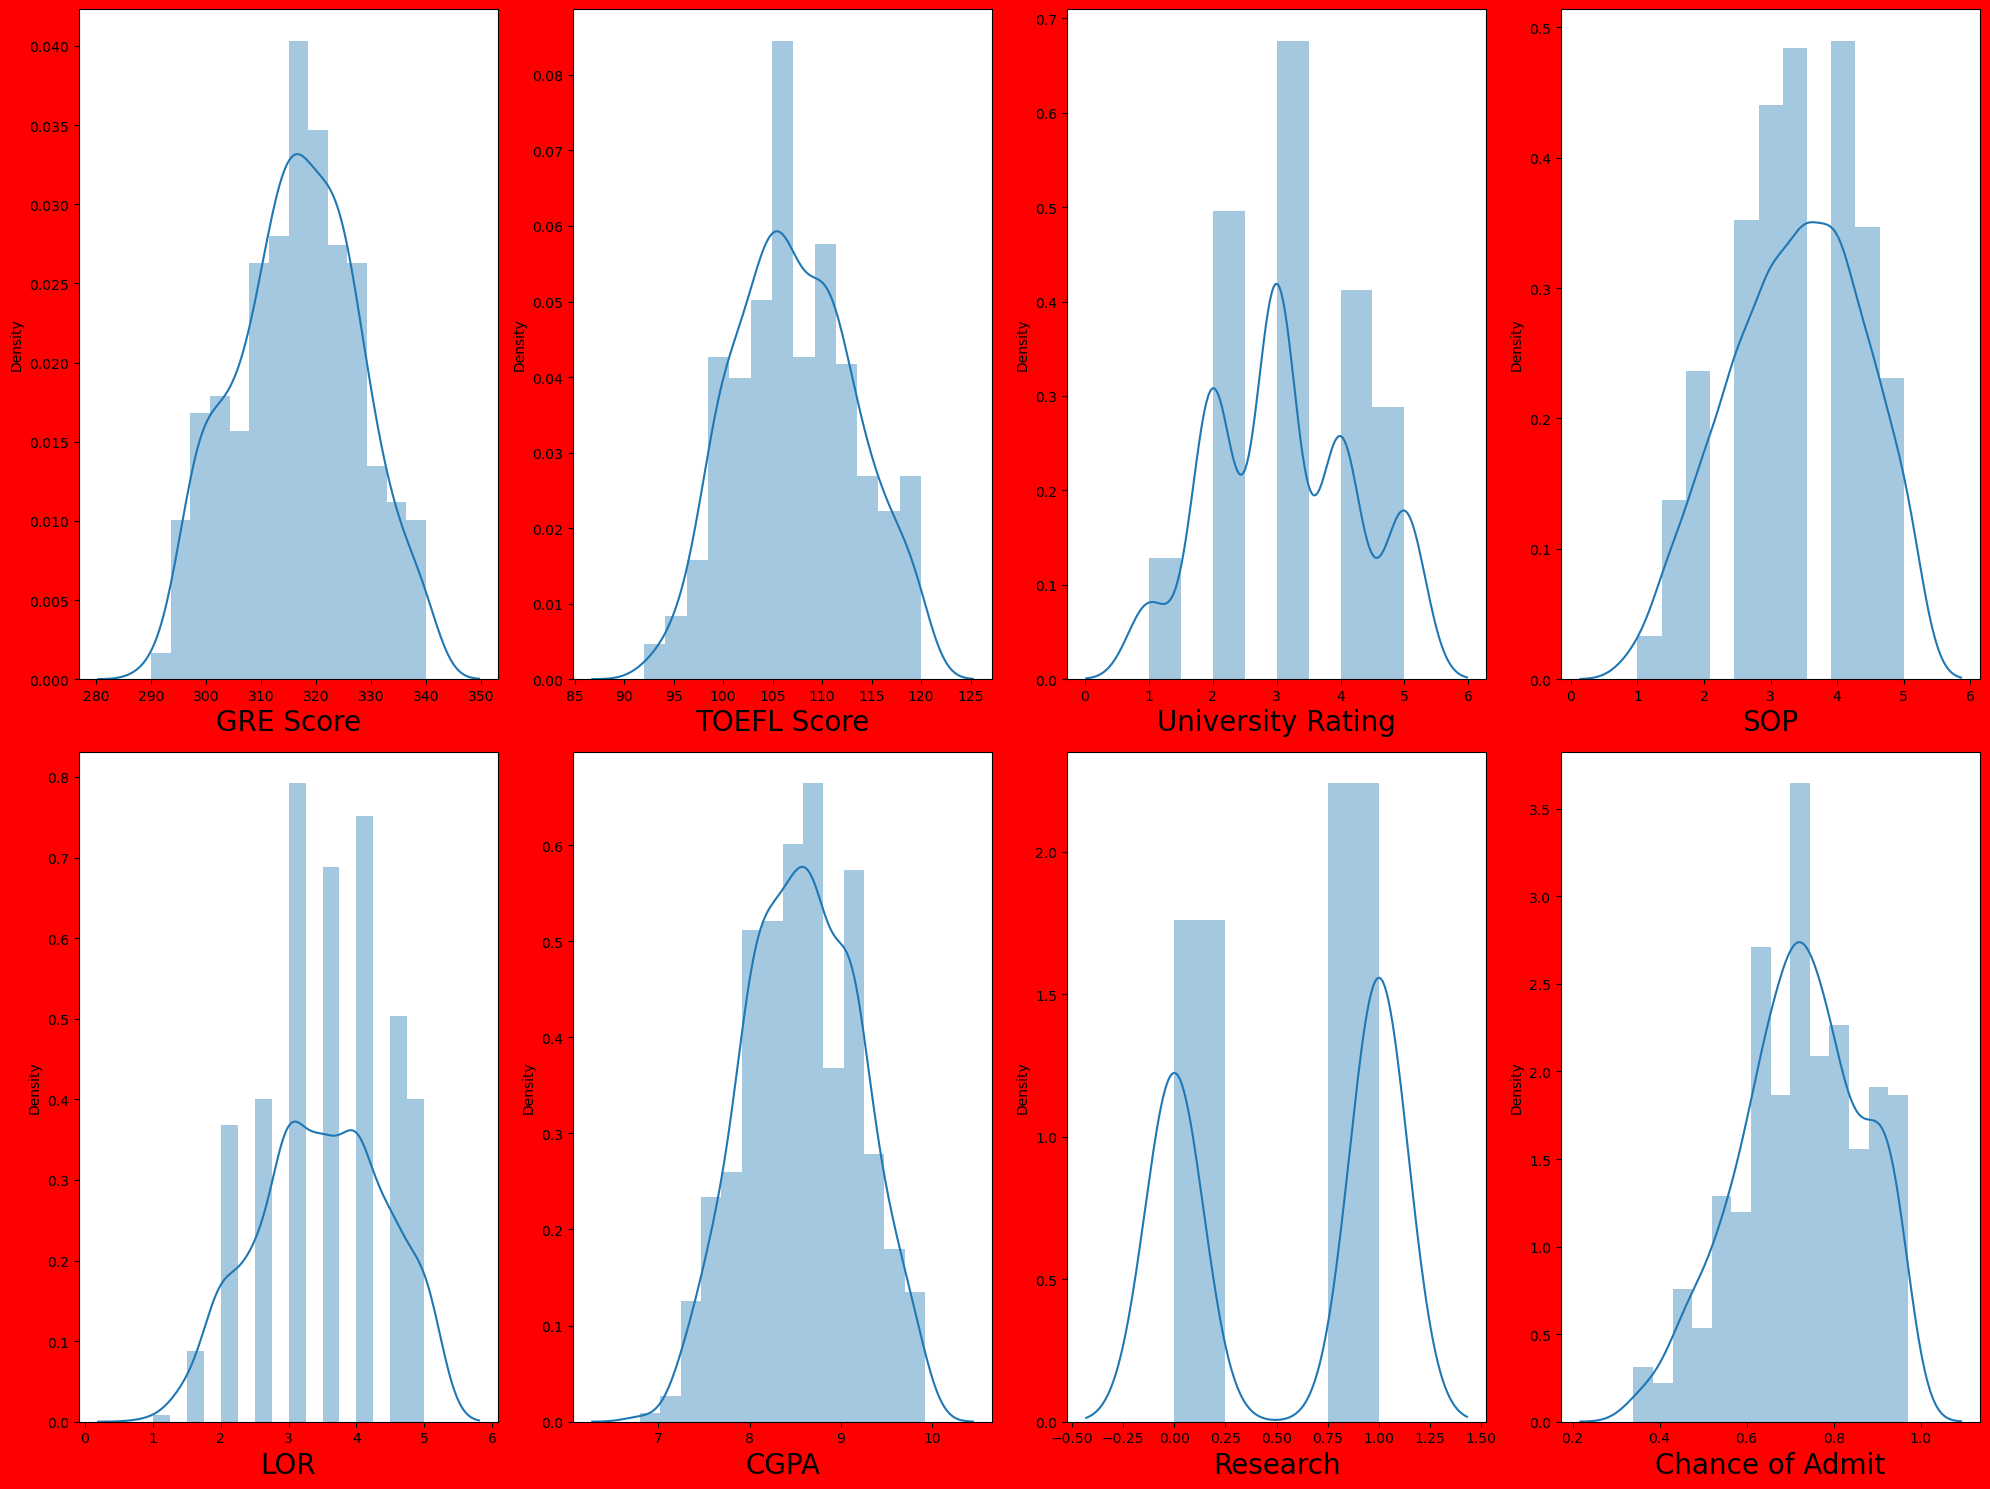

In [11]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    

Analysis EDA (explotory data analysis) which is graph analysis
    continuous data GRE,TOEFL,CGPA it is bell shaped/normal distribution curve mean it has quality data
        The data distribution looks descent and does not seem to be any skewness.great lets go ahead!
        
        
    Lets observe the relationship b/w independent variable and dependent variable    
        

In [8]:
#divide dataset into features and label
y=data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [14]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


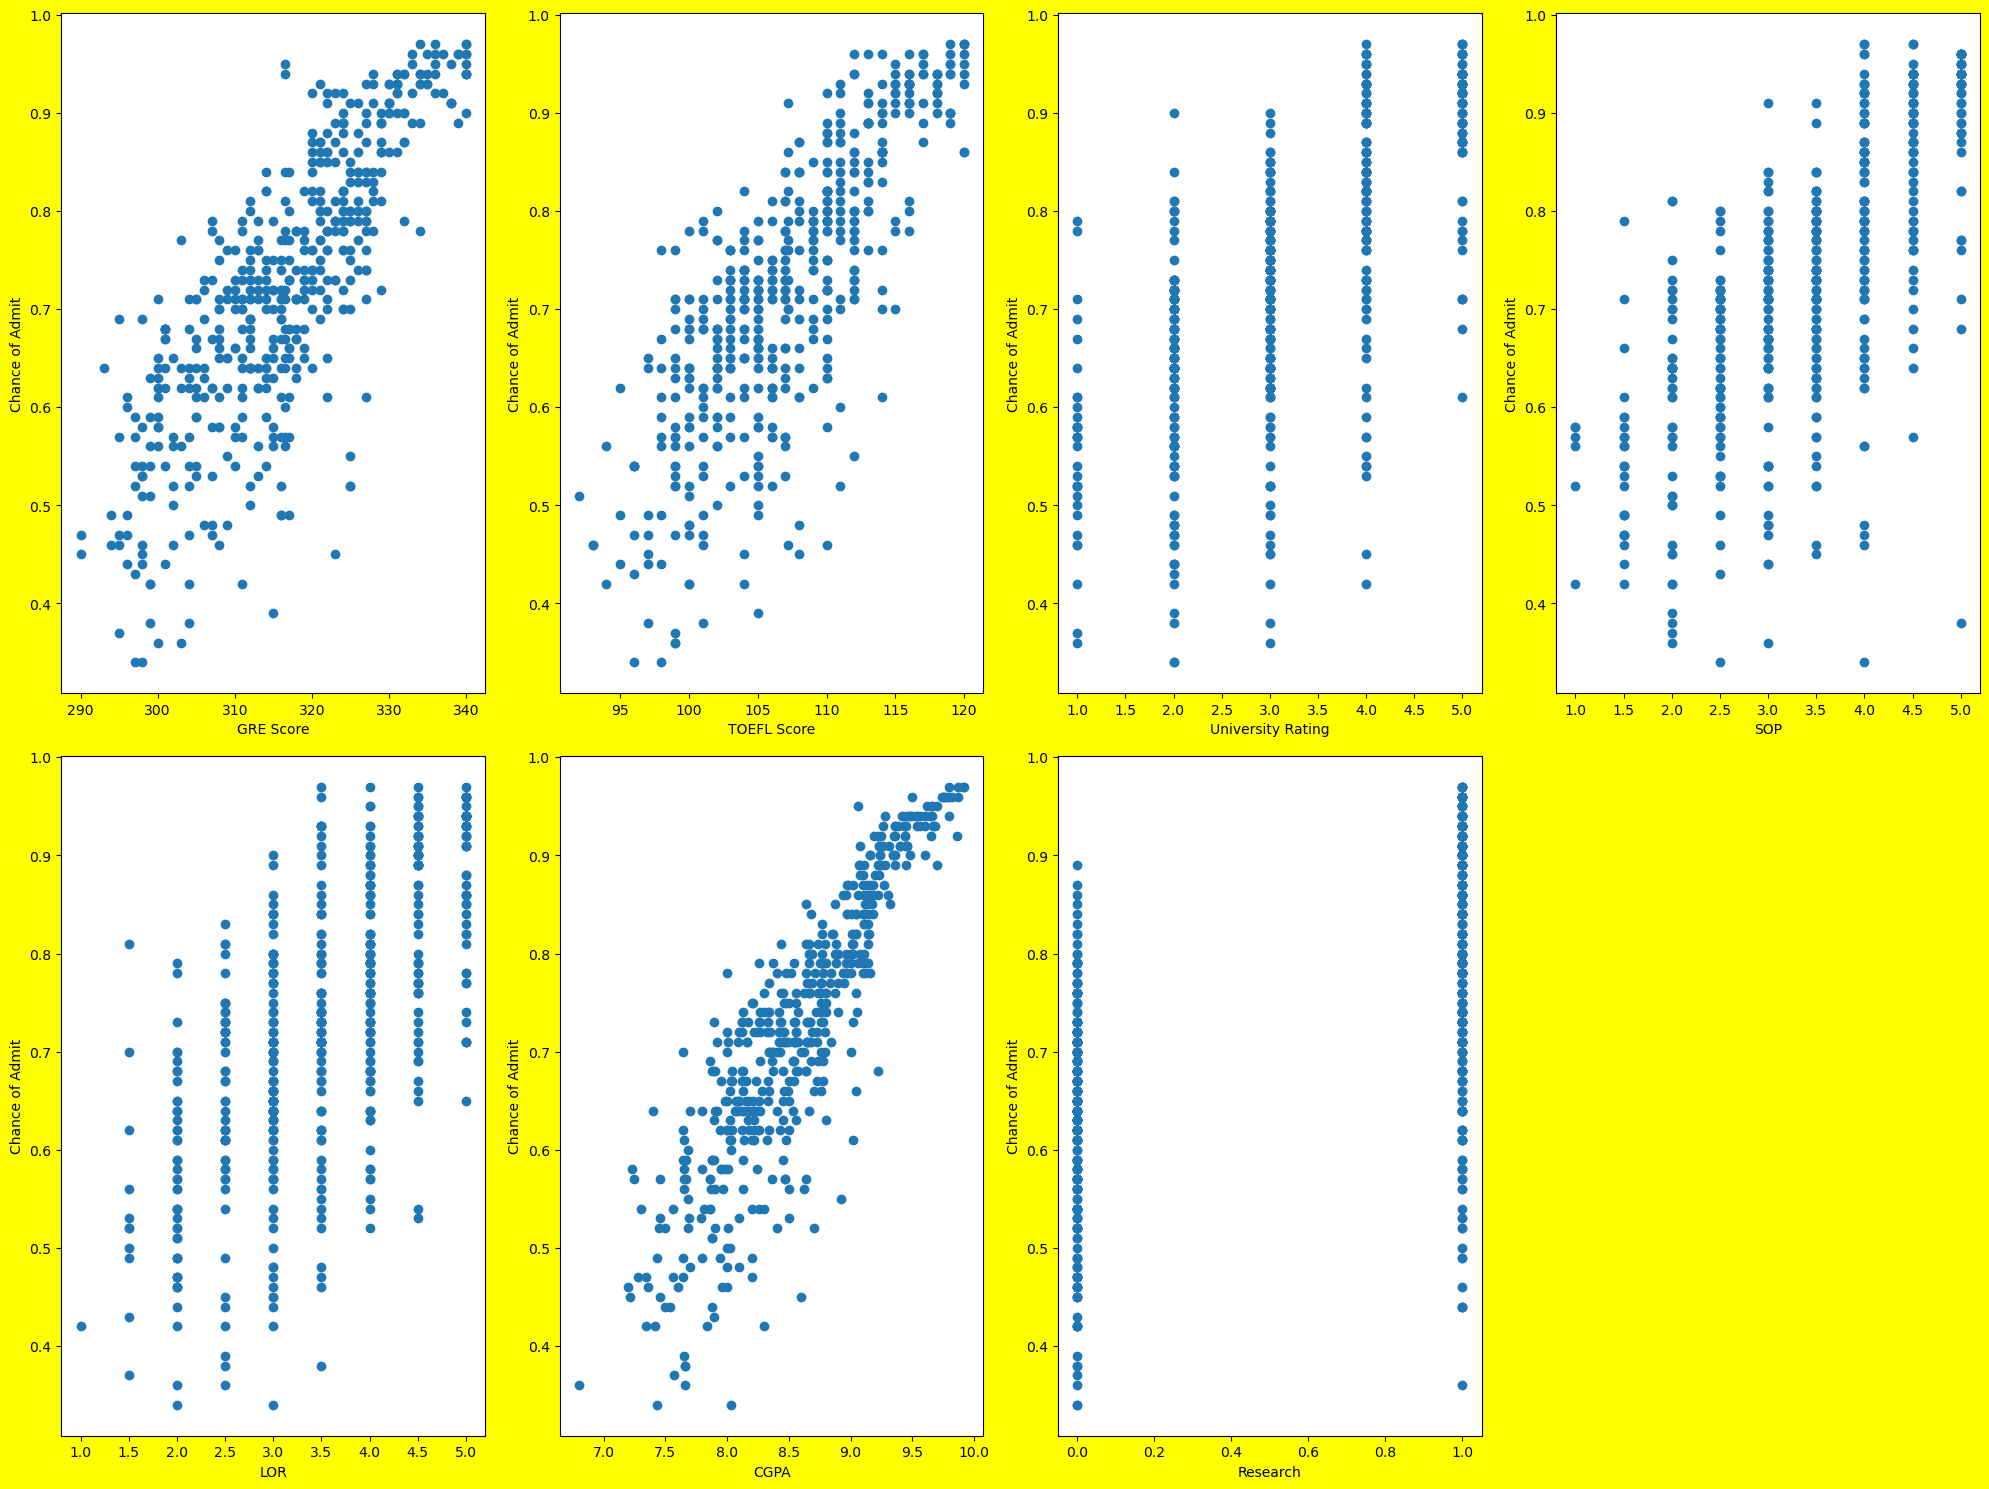

In [18]:
#visualising relationship
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    plotnumber+=1
plt.tight_layout()  

Great the relationship b/w the dependent and independent variable look fairly linear,thus our linearily assumption is satisfied

In [ ]:
#data scaling formula Z=(x-mean)/std

In [9]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

We dont want x now x_scaled will act as feature

In [10]:
#split data into train and test. model will be built on training data and tested on test data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

# Model instantiating and training

In [11]:

regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
predict the chance of admission given features

In [12]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [13]:
#since we have already fil the scaler , you can transform the data
print("Chance of Admit:",regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admit: [0.82445851]


# you can save the model and later you can use it for prediction

In [14]:
#saving the model to the local file system
pickle.dump(regression,open('reg_model','wb'))

In [15]:
#prediction  using the saved model
loaded_model=pickle.load(open('reg_model','rb'))
a=loaded_model.predict(scaler.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]]))
a

array([0.70070599])

In [16]:
#lets try on a new window with only pickle model
scaler.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]])

array([[-0.41096436, -0.69273097,  0.78200955,  0.63231549,  1.63976333,
        -0.24236699, -1.12815215]])

In [17]:
# lets check how well model fits on train data
#adjust r2 score
regression.score(x_train,y_train)

0.82855357382842

In [18]:
#lets check how well model fits the test data
regression.score(x_test,y_test)

0.7928310580010802

In [40]:
#lets plot and visualize
x_test[1]

array([2.11318582, 0.79603295, 0.78200955, 1.64240413, 1.09894429,
       1.79335687, 0.88640526])

In [19]:
y_pred=regression.predict(x_test)
y_pred

array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

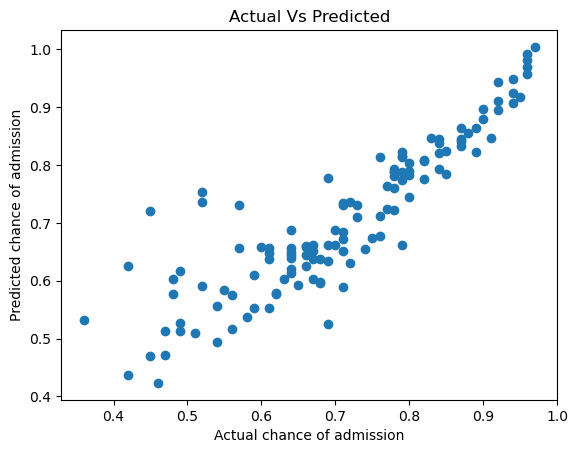

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel ('Actual chance of admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual Vs Predicted')
plt.show()

# MODEL EVALUATION

    Mean absolute error(MAE)=
    represent average error
    
    Mean squared error(MSE)=
    similar to MAE but noise is exaggerated and larger error is punished.its harder to interpret than MAE and its not in base       units however it is generally more popular.
    
    Root mean sqared error(RMSE)=
    most popular metrics,similar to MSE,however the result is squared root to make interpretable as itds in base unit . it is recommended that RMSE be used as primary metric to interpret your model

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [44]:
#MAE
mean_absolute_error(y_test,y_pred)

0.04421359936541998

In [45]:
#MSE
mean_squared_error(y_test,y_pred)

0.004309172332351598

In [46]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.06564428636485888

you have successfully completed building linear regression model,now,lets check if our model 

Lets see if our model is overfitting our training data

Regularization=
        when we use regression model to train some data,there is a good chance that the model will overfit the given training data set.regularization helps sort this overfitting problem by restricting the degree of freedom of a given equation ie. simply reducing thr no of degree of polynomial funcn by reducing their corresponding weights
        
LASSO:
(least absolute shrinkage and selection operator)[L1 form]
    LASSO regression penalizes the model based on the sum of magnitude of the coefficient.
    the regularization term is given by regularization
    LAMBDA*sum beta
    where, lambda is the shrinkage function
    
    
 Ridge regression[L2 form]:
     ridge regression penalizes the model based on the sum of square of magnitude of the coefficient.
     the regularization term is given by regularization
     lambda*sum of sq of beta
     

In [1]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [20]:
lasscv=LassoCV(alphas=None,max_iter=10)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=10)

In [21]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

0.0006090008804969982

In [22]:
#now that we have best parameter, lets use Lasso regression and see how well our data had fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0006090008804969982)

In [23]:
lasso_reg.score(x_test,y_test)

0.7938036352038629

In [24]:
lasso_reg.score(x_train,y_train)

0.8284562761029133

In [25]:
#using ridge regression model
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [26]:
#Ridgecv will return best alpha and coefficients after performing 10 cross validations
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [28]:
ridgecv.alpha_

0.09099999999999998

In [29]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [30]:
ridge_model.score(x_test,y_test)

0.7928351268338166

we got the same r2sq using ridge regression as well,so it is safe to say there is no overfitting.

lets see the underlaying assumption
   1 the regression model is linear in term of coefficients and error term
   2 the mean of the residuals is zero
   3 the error terms are not correlated with each other ie. given an error:we vcannot predict the next error value
   4 no multicollinearity,ie. no independendent variable should be correlated with each other or affect one another. if this is multicollinearity the precision of prediction by the OLS model decrease
   5 the error term is normally distributed

# LOGISTIC REGRESSION

LOGISTIC regression is called as classification algorithms,model
IT is one of the supervised machine learning model which can be used for binary classification----only binary classification

SIGMOID FUNCTION:
    it is the underlying funcn in logistic regression
    range(0-1) dt=1/1+e^-t
    t=(mx+c)
    
    
   EVALUATION OF A CLASSIFICATION MODEL
   
       :accuracy  :recall :precision :F1 score :specifity :AUC(area under curve) :ROC(receive operator characteristic)

# confusion matrix
a typical confusion matrix looks like the fig shown
              
              actual         
                 
                 +ve  -ve
          
          +ve    tp  fp
                             
predicted
          -ve    fn     tn




TP (true positive)
    A result that was predicted as pasitive by the classification model and aldo is positive
    
    
TN(true negative):
    the result that was predicted as negative by the classification model and also is negative
    
    
FP(false positive):
    the result that was predicted as positive by the classification mode but actually is negative
    
    
FN(false negative):
    result predicted negative by the classification model but actually positive.
    
    
    
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    
    
    RECALL/SENSIVITY(USED IN TYPE 2)
     It is the measure of from total no of +ve result how many +ve were correctly predicted by the model.
         
         
         RECALL=  TP/(TP+FN)    #COLUMN WISE
    

   PRECISION(TYPE1 business)
          
          It is the measure of amongst all the positive prediction, how many of them were actually positive
          
          
           PRECISION= TP/(TP+FP)
           
           
   F1 SCORE: 
       combination of both precision and recall
           
           F1 SCORE=2(PRECISION * RECALL)/(PRECISION + RECALL)
           
           
           
  TRUE NEGATIVE RATE/ SPECIFICITY:
      
      TRUE NEGATIVE RATE = TN/(TN + FP)
      FALSE POSITIVE RATE = 1- TRUE NEGATIVE RATE
      
      
 ROC(receiver operater characteristic):
     
     for every threshold how model is going to change its prediction rate
           


# python implementation

Q)Based on the pima indian ,build a M.L Binary classification model to predict if the person is diabetic or not based on below feature
    pregancies,glucose,b.p,skin thickness insulin,bmi diabetes
    
 label
     outcome
     

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# DATA PROCESSING


    1)Data cleaning
    
    2)EDA (analysis)
    
    3)finding and treating outliers(if any)
    
    4)feature selecing for model building
    
    5)data standardizationb.p,skin thickness,insulin which have value as 0 that is not possible
    
 we can see there few data for columns glucose, insulin b.p,skin thickness thats not possible in real time.  

In [5]:
#replace zero value with the mean of the column
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


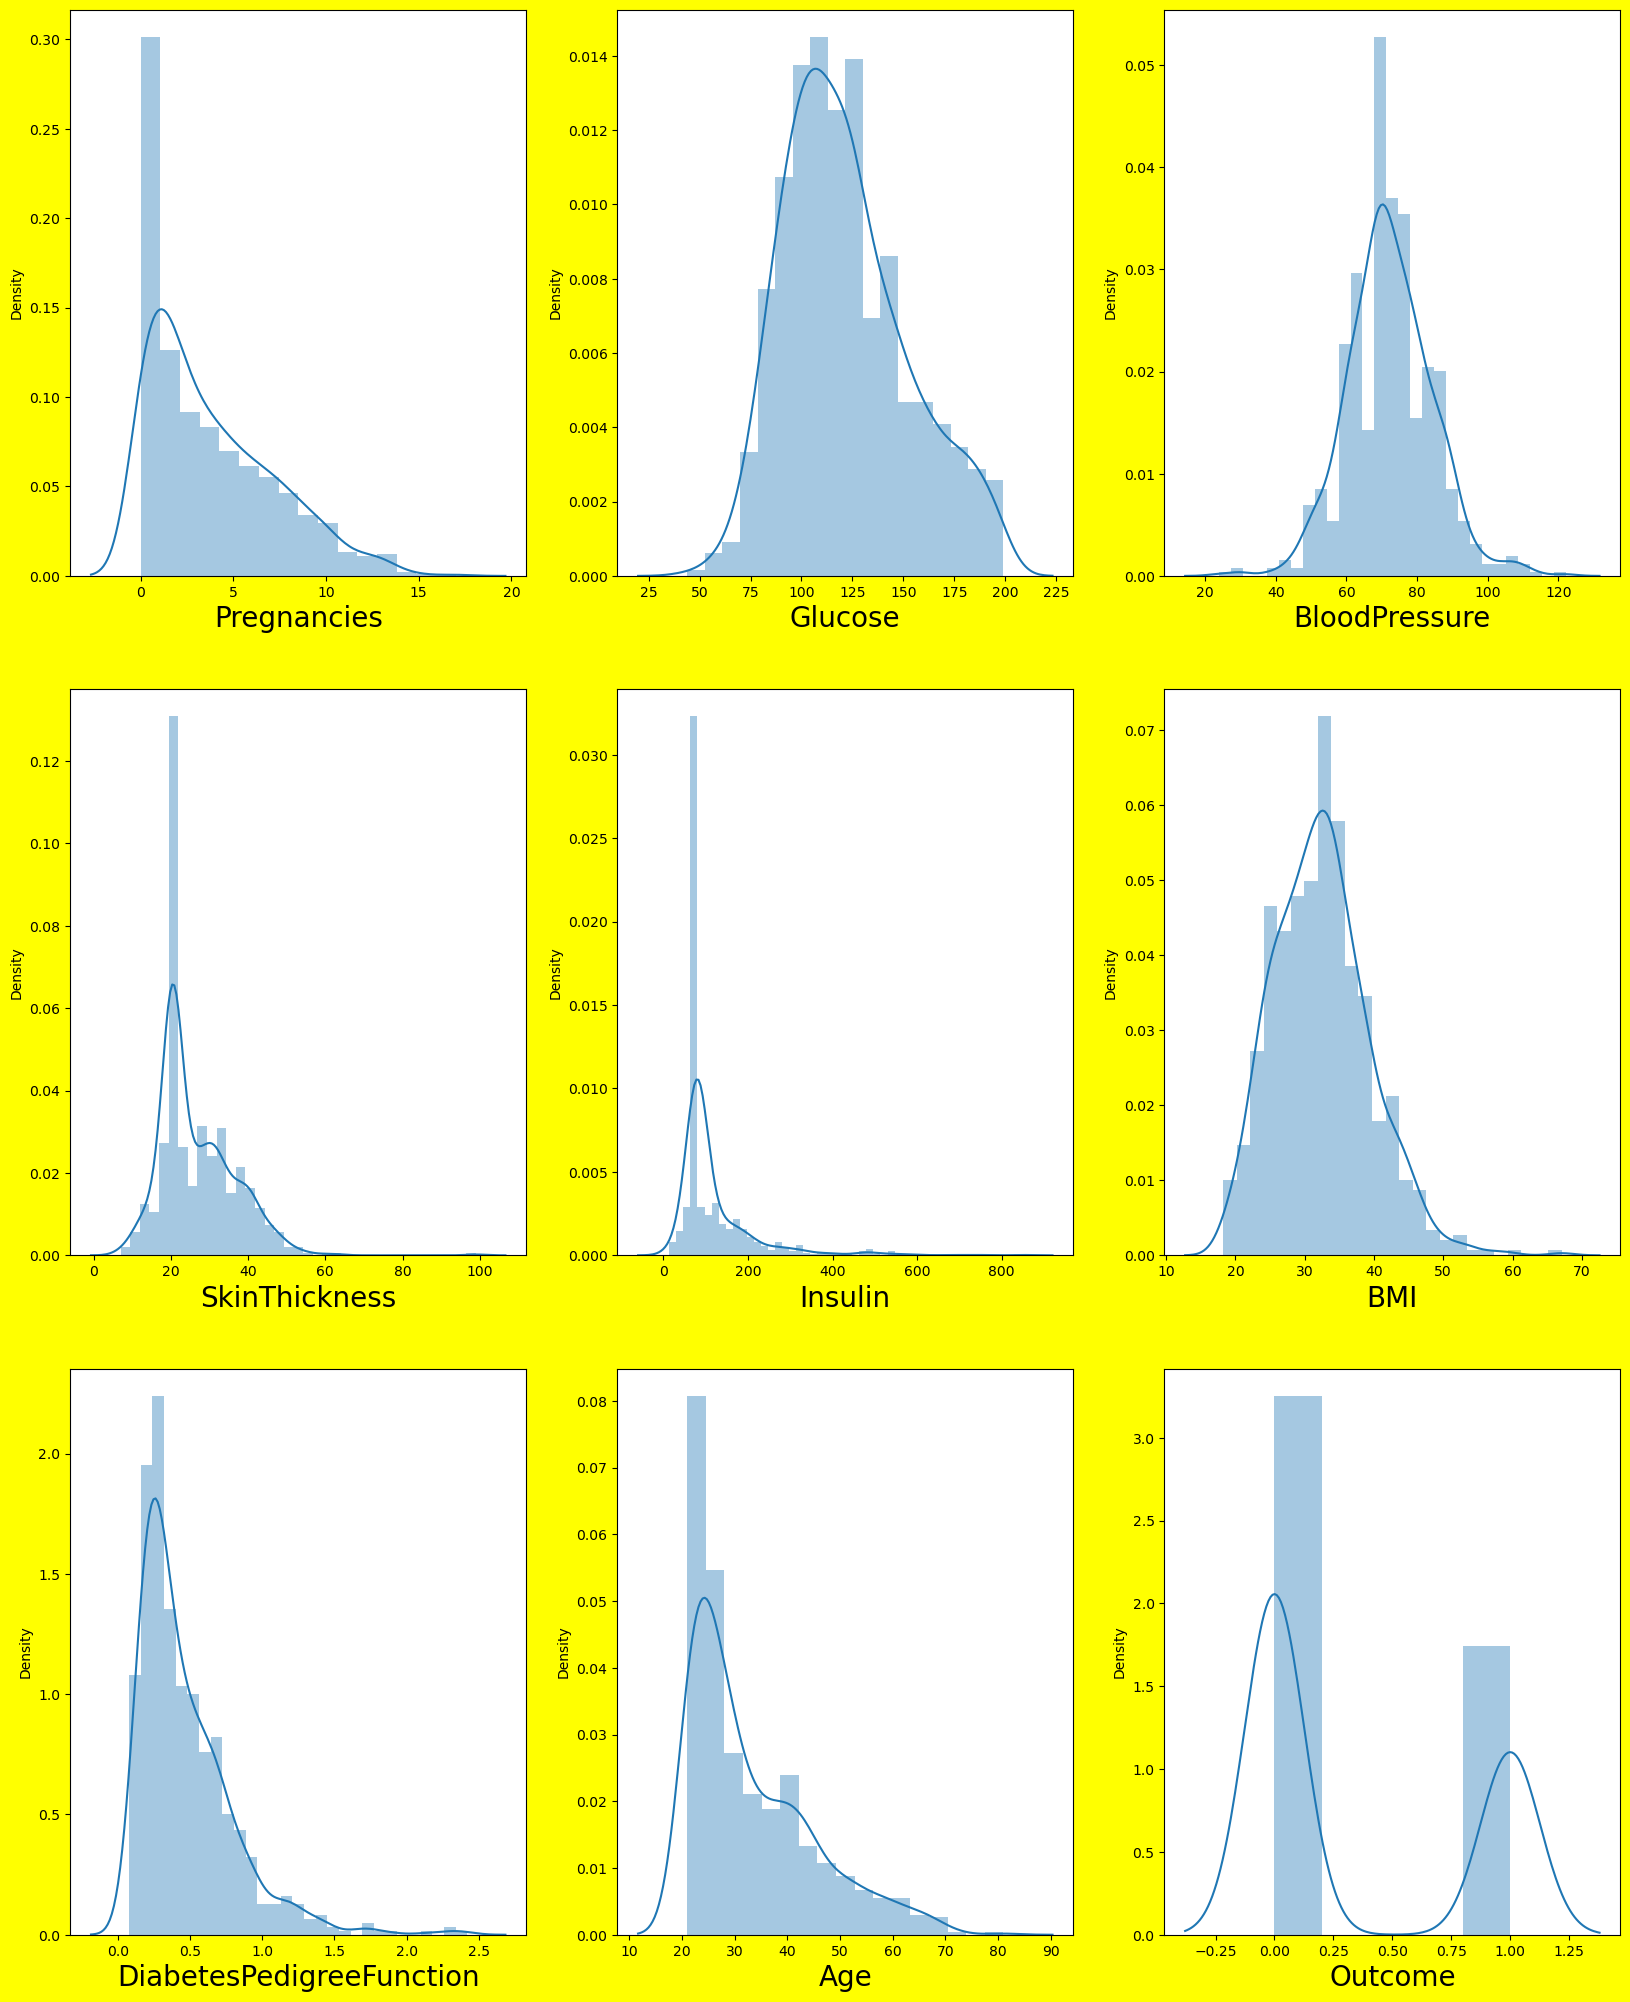

In [7]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=9: #there are 9 column
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

lot of skewness in every data

In [8]:
df_features=data.drop('Outcome',axis=1)
df_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


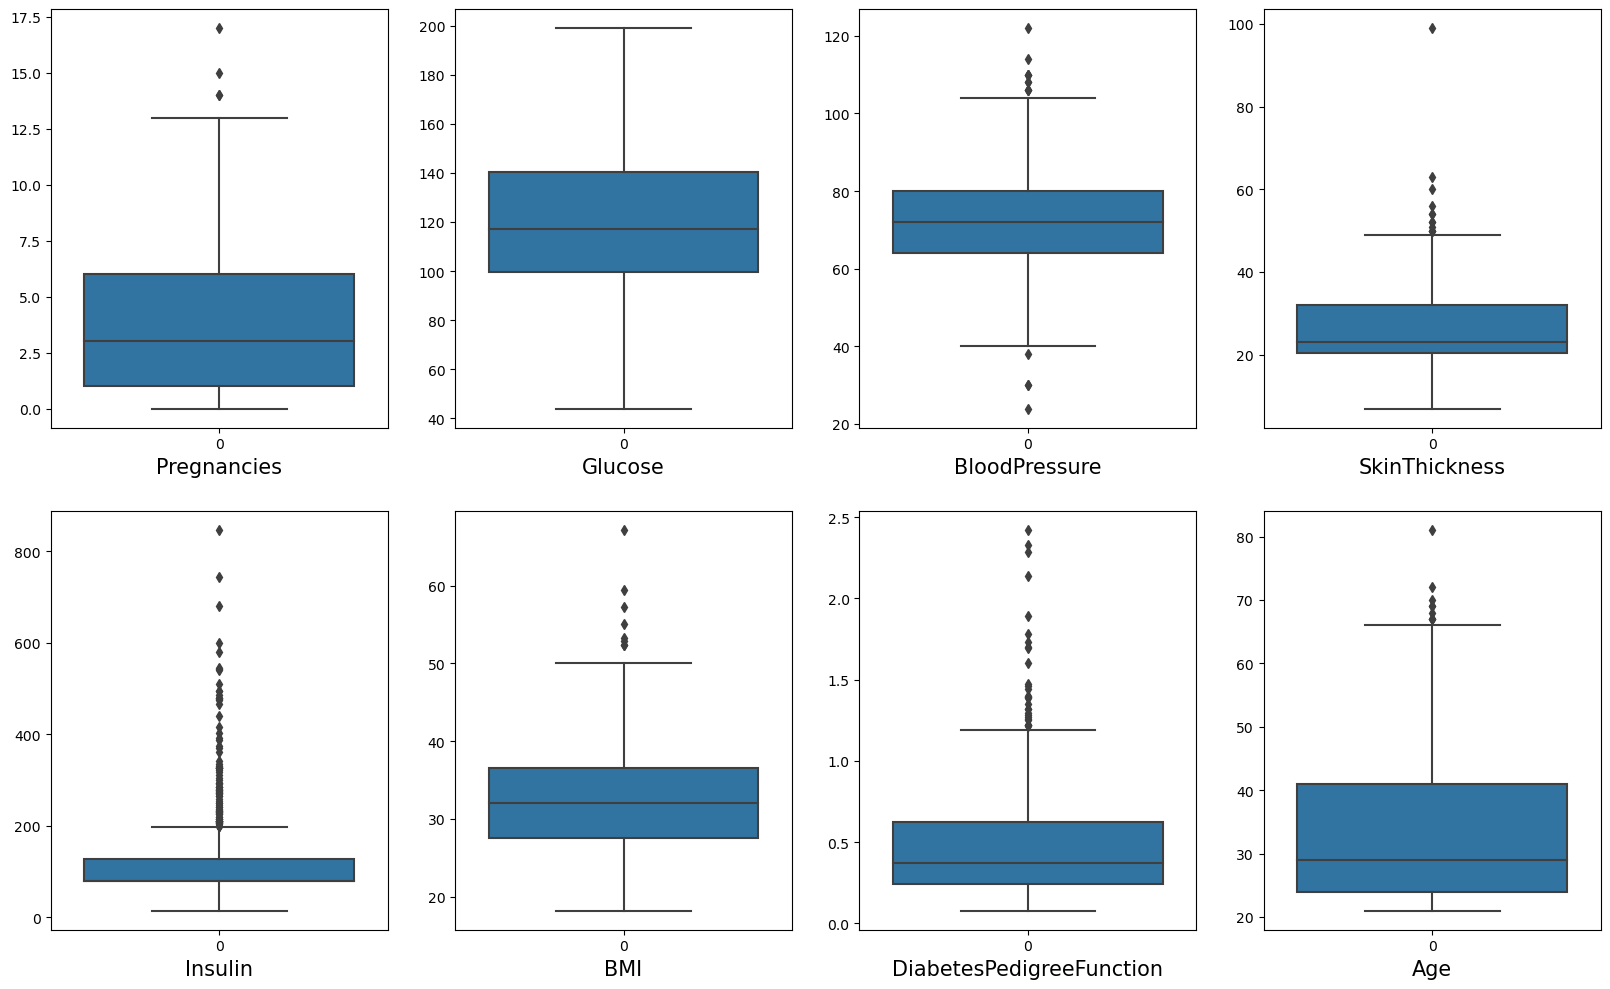

In [9]:
#visualizethe outlier using boxplot
plt.figure(figsize=(20,25))
graph=1
for column in df_features:
    if graph<=9:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()    

In [71]:
data.shape

(768, 9)

In [10]:
#find theIQR to identify outlier
Q1=data.quantile(.25)
Q3=data.quantile(.75)
iqr=Q3-Q1

outlier detection

higher side=Q3+(1.5*iqr)
lower side= Q1-(1.5*iqr)

In [11]:
#validating one outlier
preg_high=(Q3.Pregnancies+(1.5*iqr.Pregnancies))
preg_high

13.5

In [12]:
#check the index which have higher values
np_index=np.where(data['Pregnancies']>preg_high)
np_index

(array([ 88, 159, 298, 455], dtype=int64),)

In [13]:
#drop the index which we found in the above cell
data=data.drop(data.index[np_index])

In [14]:
data.shape

(764, 9)

In [15]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [16]:
bp_high=(Q3.BloodPressure+(1.5*iqr.BloodPressure))
print(bp_high)

104.0


In [17]:
#check the index which have higher values
np_index=np.where(data['BloodPressure']>bp_high)
np_index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

In [18]:
#drop the index which we found in the above cell
data=data.drop(data.index[np_index])

In [19]:
data.shape

(754, 9)

In [20]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
st_high=(Q3.SkinThickness+(1.5*iqr.SkinThickness))
st_high

49.1953125

In [22]:
#check the index which have higher values
np_index=np.where(data['SkinThickness']>st_high)
np_index

(array([ 56,  84,  96, 116, 146, 205, 267, 269, 437, 523, 569, 581],
       dtype=int64),)

In [23]:
#drop the index which we found in the above cell
data=data.drop(data.index[np_index])

In [24]:
data.shape

(742, 9)

In [25]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [26]:
in_high=(Q3.Insulin+(1.5*iqr.Insulin))
print(in_high)
np_index=np.where(data['Insulin']>in_high)

data=data.drop(data.index[np_index])
print(data.shape)
data.reset_index()


198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [27]:
bmi_high=(Q3.BMI+(1.5*iqr.BMI))
print(bmi_high)
np_index=np.where(data['BMI']>bmi_high)

data=data.drop(data.index[np_index])
print(data.shape)
data.reset_index()


50.25
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [28]:
db_high=(Q3.DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction))
print(db_high)
np_index=np.where(data['DiabetesPedigreeFunction']>db_high)

data=data.drop(data.index[np_index])
print(data.shape)
data.reset_index()


1.2
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [29]:
ag_high=(Q3.Age+(1.5*iqr.Age))
print(ag_high)
np_index=np.where(data['Age']>ag_high)

data=data.drop(data.index[np_index])
print(data.shape)
data.reset_index()


66.5
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [30]:
bp_low=(Q1.BloodPressure-(1.5*iqr.BloodPressure))
print(bp_low)
np_index=np.where(data['BloodPressure']<bp_low)

data=data.drop(data.index[np_index])
print(data.shape)
data.reset_index()



40.0
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


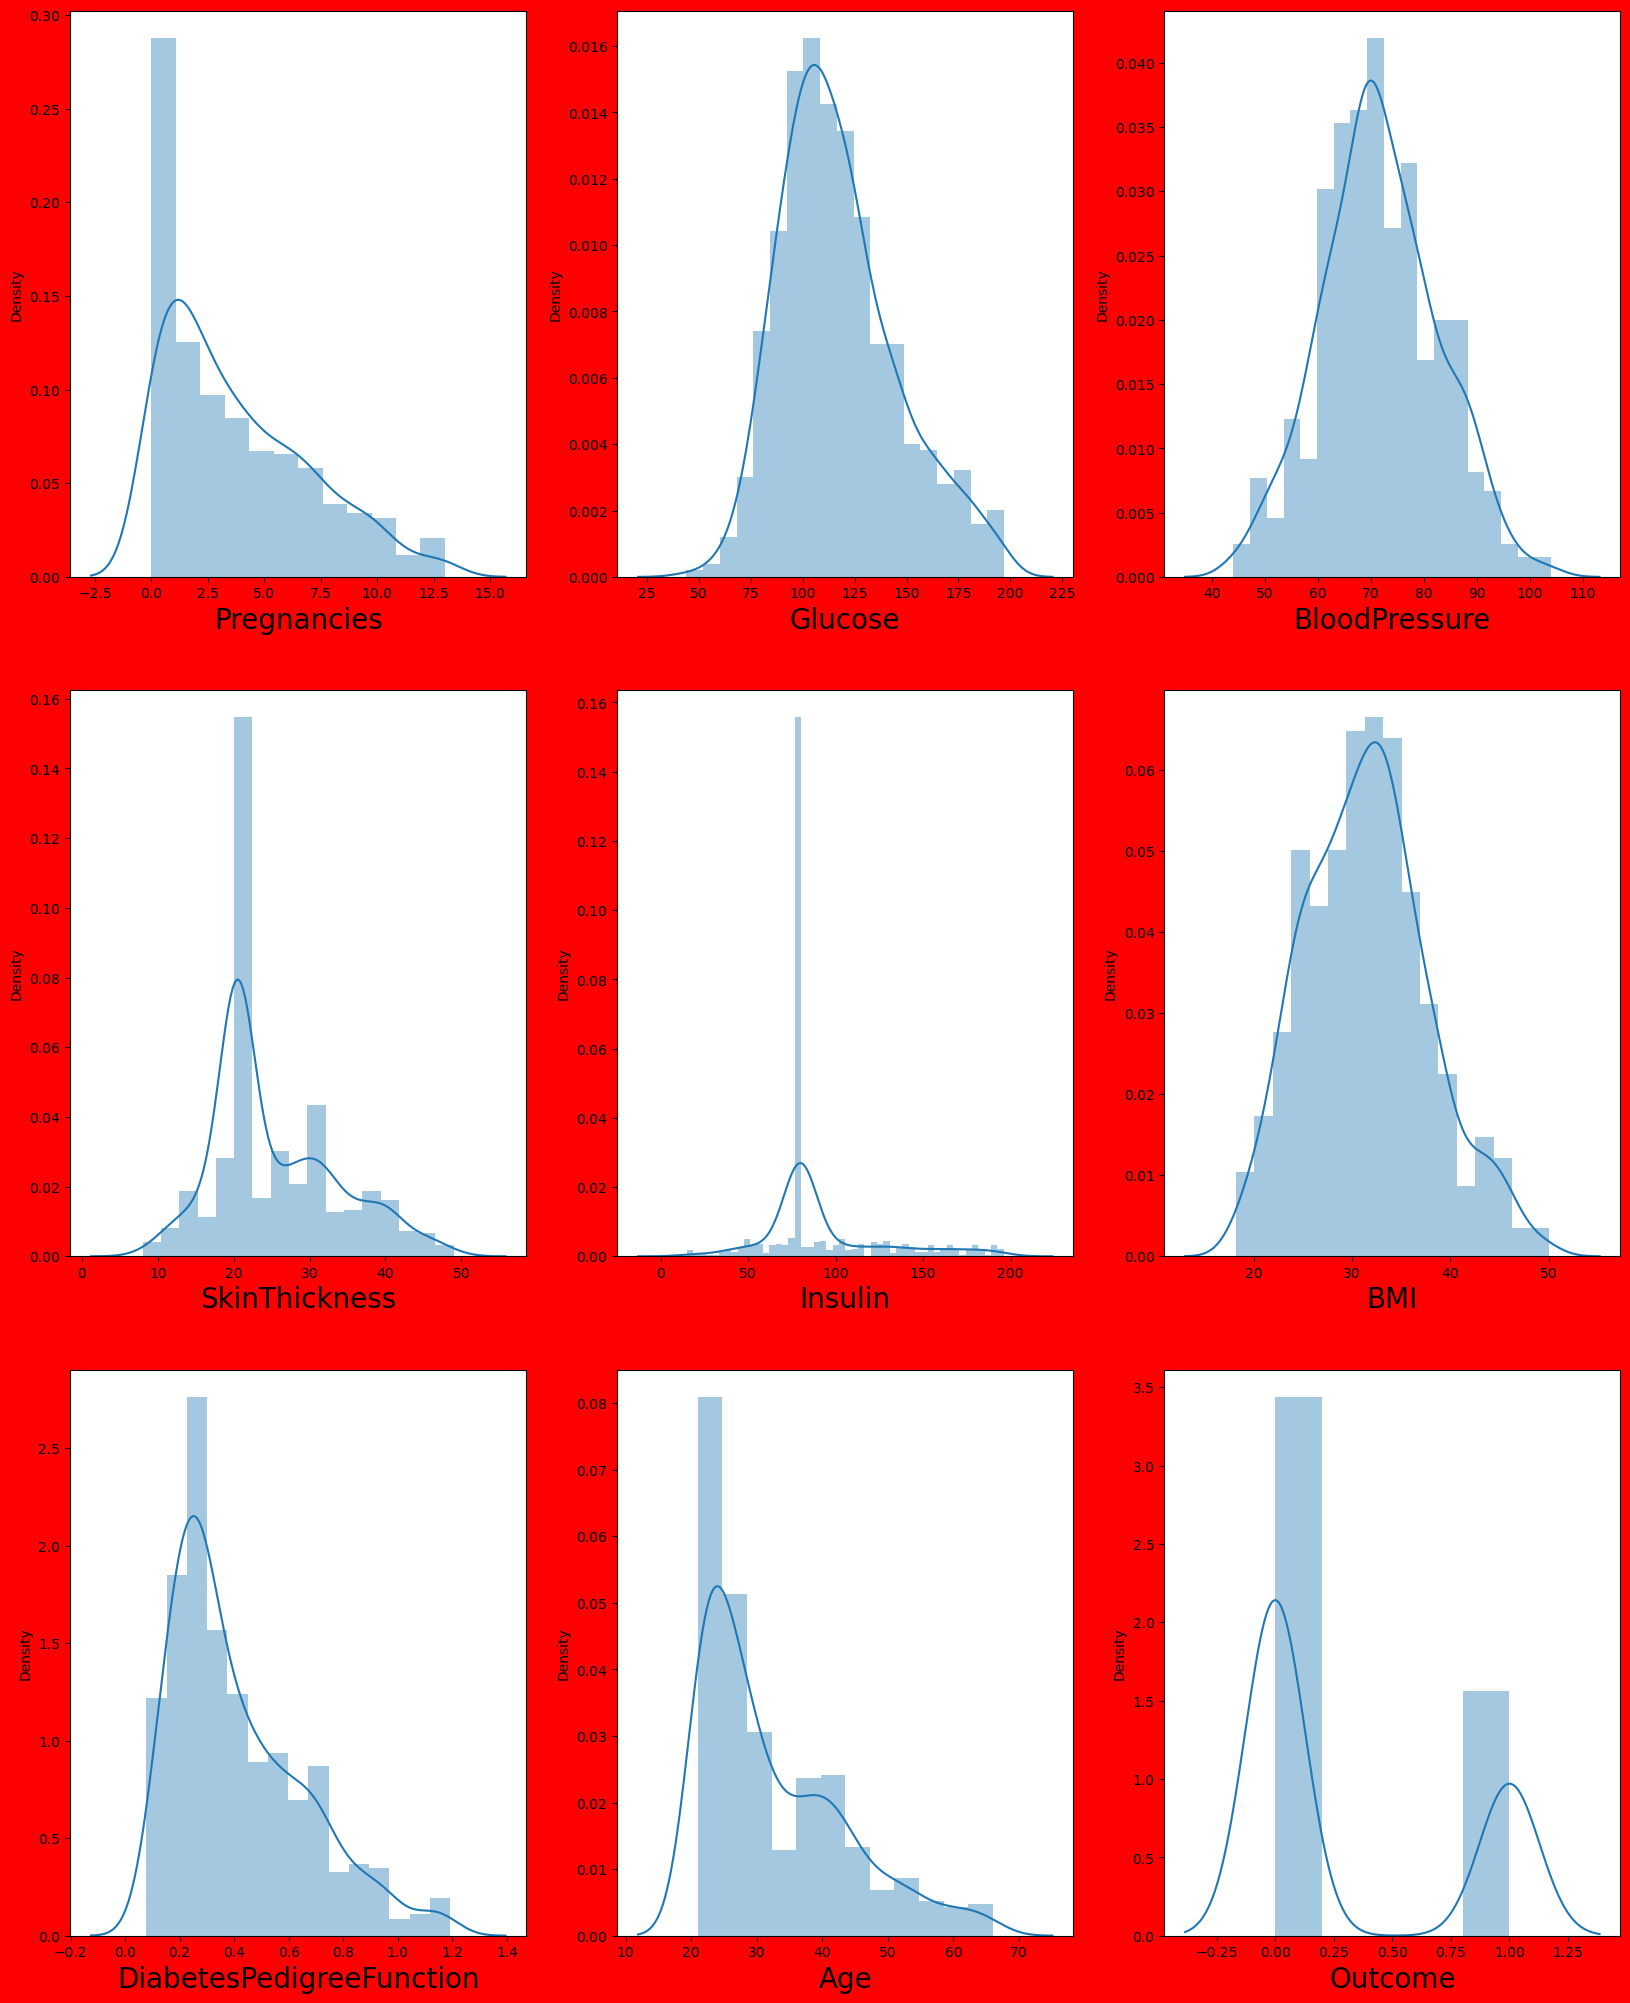

In [31]:

plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=9: #there are 9 column
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    


# finding relationship, we want to keep only those features which have relationship with label

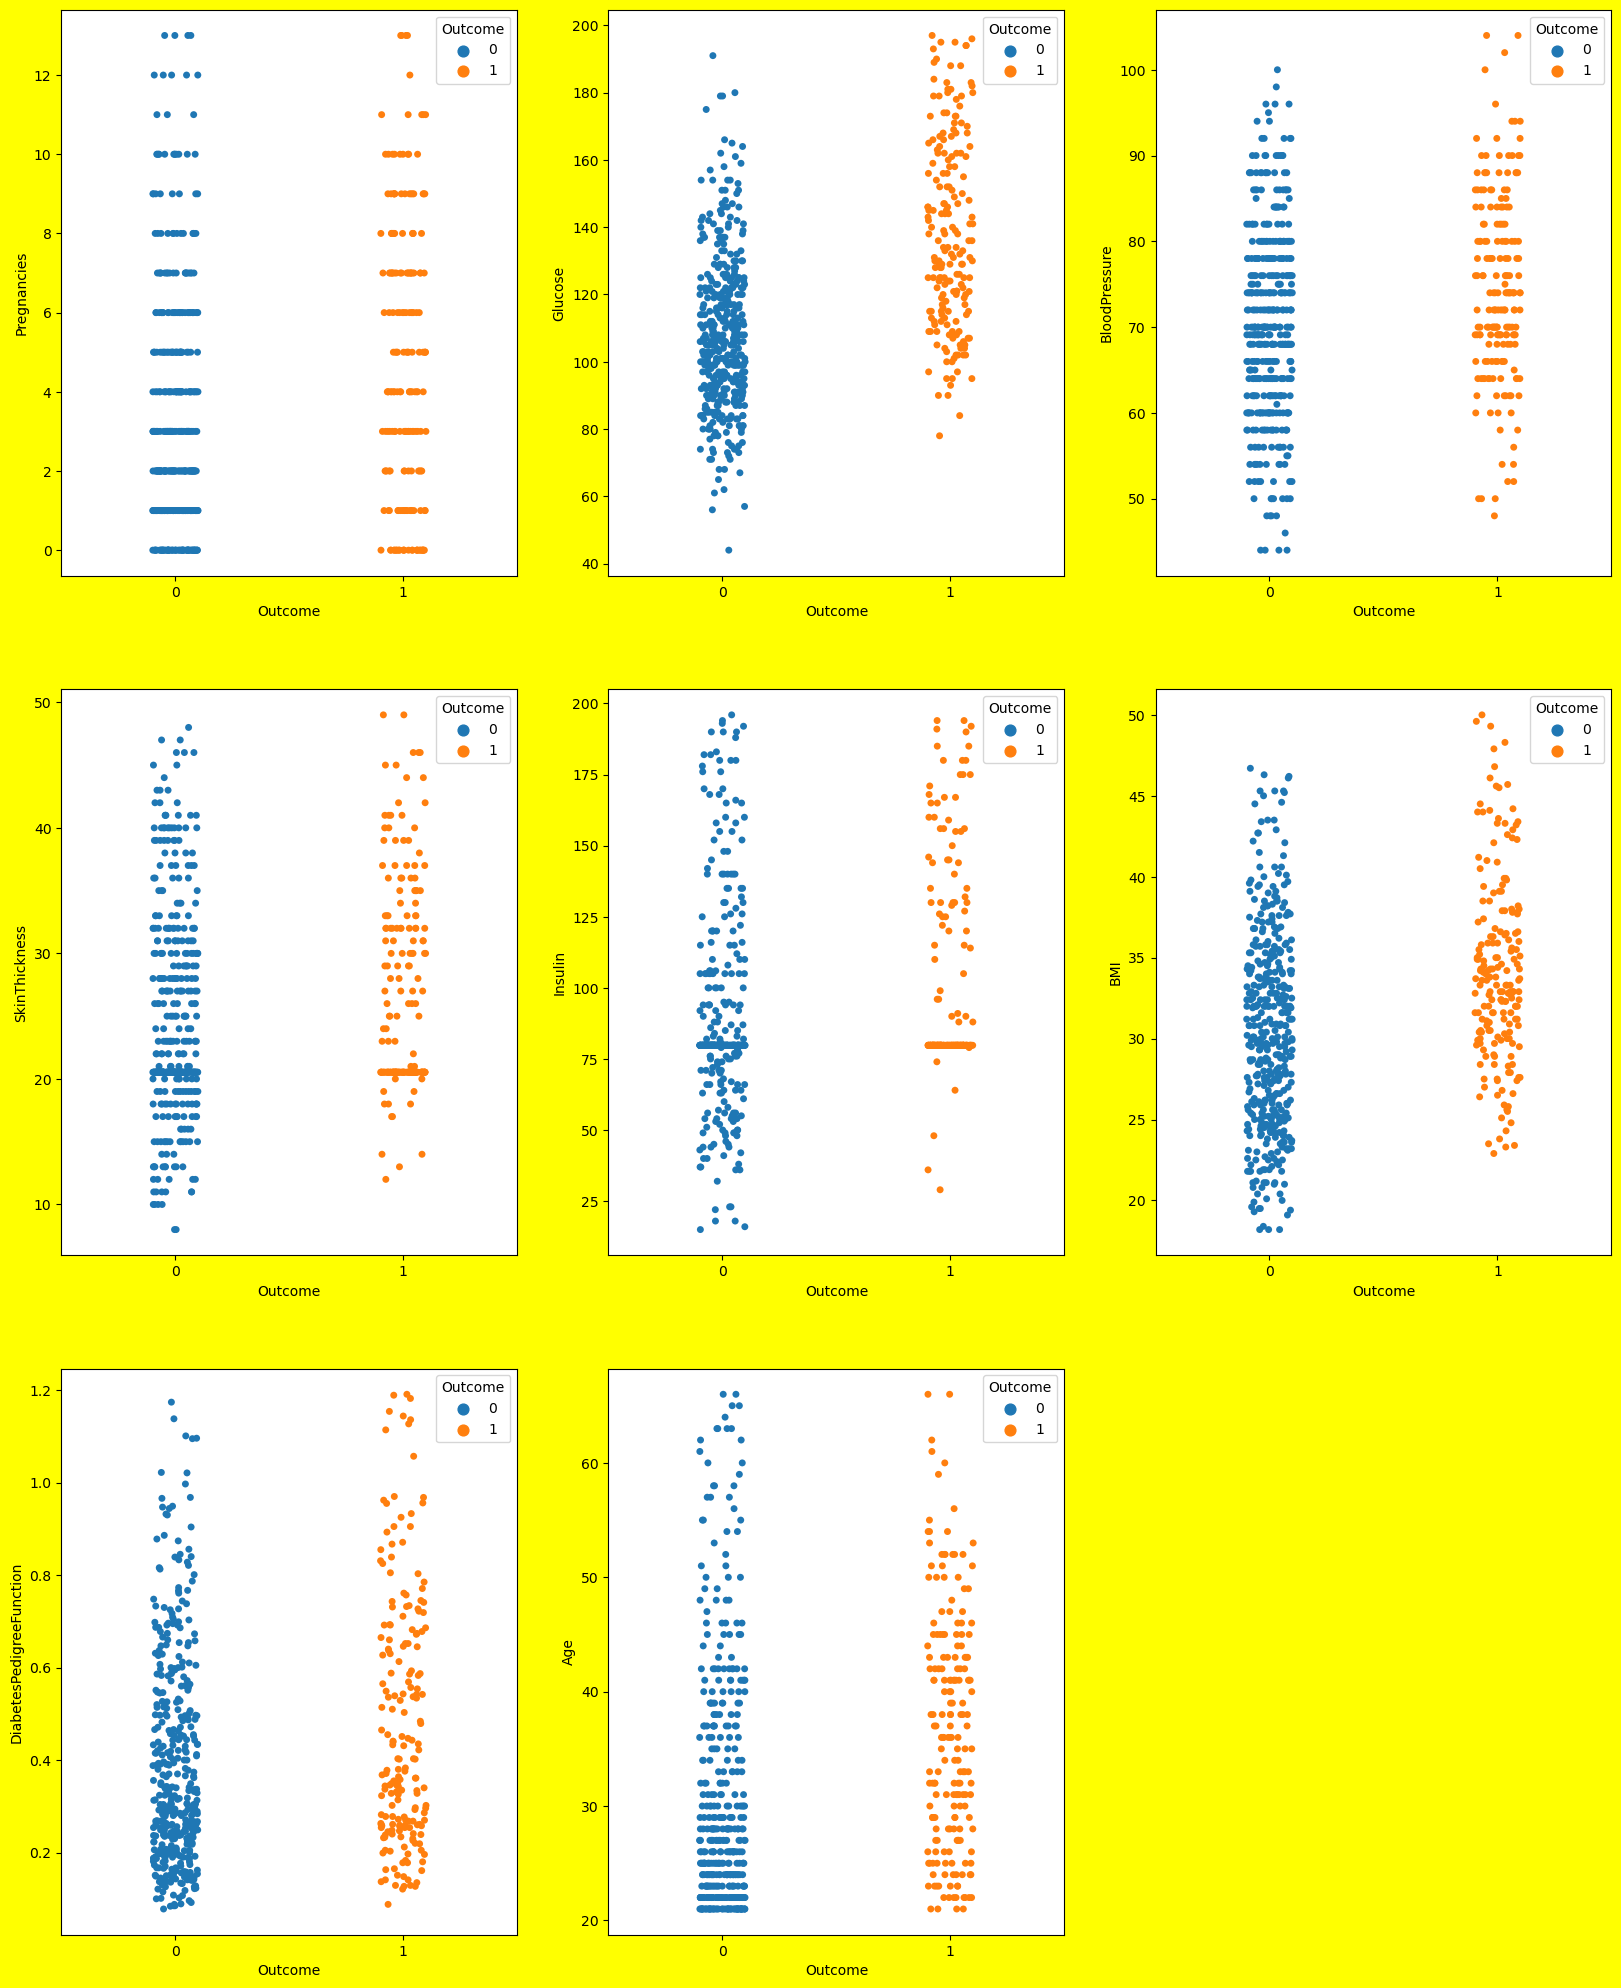

In [35]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']
#lets see how features are related to class
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=9: #there are 9 column
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=x[column],hue=y)
        
    plotnumber+=1
plt.show()    


# check multicollinearity problem.find if one feature is dependent on another feature

In [33]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# multicollinearity using VIF(variance inflation factor)

In [34]:
x_scaled.shape[1]

8

In [ ]:
#finding variance inflation factorin each scaled column ie x_scaled.shape [1] (1/(1-r2))

In [36]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


All the VIF values are less than 5 and are very low that means no multicollinearity,Now we can go ahead with fitting our data to a model.

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=355)

# pre-processing steps completed

# MODEL BUILDING

In [41]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)



LogisticRegression()

In [42]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0], dtype=int64)

In [43]:
log_reg.predict_proba(x_test)

array([[0.27644852, 0.72355148],
       [0.9884465 , 0.0115535 ],
       [0.71320913, 0.28679087],
       [0.41727663, 0.58272337],
       [0.65256166, 0.34743834],
       [0.16747081, 0.83252919],
       [0.67217673, 0.32782327],
       [0.96760466, 0.03239534],
       [0.83090765, 0.16909235],
       [0.70960968, 0.29039032],
       [0.61236335, 0.38763665],
       [0.82448072, 0.17551928],
       [0.55924335, 0.44075665],
       [0.52295435, 0.47704565],
       [0.25325268, 0.74674732],
       [0.97019571, 0.02980429],
       [0.49845311, 0.50154689],
       [0.91072363, 0.08927637],
       [0.97768536, 0.02231464],
       [0.64897542, 0.35102458],
       [0.52870881, 0.47129119],
       [0.78479246, 0.21520754],
       [0.78466007, 0.21533993],
       [0.44685677, 0.55314323],
       [0.75832183, 0.24167817],
       [0.35577336, 0.64422664],
       [0.69081478, 0.30918522],
       [0.62136906, 0.37863094],
       [0.94699644, 0.05300356],
       [0.64984246, 0.35015754],
       [0.

# MODEL ACCURACY

In [44]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7612903225806451

In [45]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat
                        

array([[94, 11],
       [26, 24]], dtype=int64)

lets check model accuracy manually=TP+TN/(TP+TN+FN+FP)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.69      0.48      0.56        50

    accuracy                           0.76       155
   macro avg       0.73      0.69      0.70       155
weighted avg       0.75      0.76      0.75       155



In [49]:
#roc curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [50]:
print('threshold',thresholds)
print('true positive rate',tpr)
print('false positive rate',fpr)

threshold [2 1 0]
true positive rate [0.   0.48 1.  ]
false positive rate [0.        0.1047619 1.       ]


plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic(roc) curve')
plt.legend
plt.show()

In [53]:
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.6876190476190477